## Kvalita vína

Vrať se k experimentu z lekce, který se zabýval kvalitou vína. 

Tentokrát vyber hodnotu parametru `n_neighbors` na základě metriky `precision`.

Nejprve se zamysli nad tím, co by nás k tomu vedlo. Která z těchto možností je správná?

1. Je lepší na základě modelu nekoupit dobré víno, než koupit špatné víno a to pak vyhodit.
2. Je lepší koupit omylem špatné víno a to pak vyhodit, než promeškat nákup dobrého víno.


In [9]:
# Je lepší nekoupit dobré víno, než plýtvat a vyhazovat špatné.

# Proto budeme vybírat na základě metriky PRECISION místo ACCURACY.

# Tato metrika penalizuje označení špatného vína za dobré.
# Kdežto Accuracy určuje poměr správně určených záznamů oproti celku.

In [6]:
# !pip install scikit-learn

import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Na základě grafu vyber tu hodnotu parametru, která dává nejlepší výsledek (nejvyšší hodnotu při volání `precision_score()`). 

Liší se tvůj zvolený parametr od parametru, který jsme jako závěrečný zvolili v lekci? 

In [10]:
# Nejvyšší hodnota metriky PRECISION je s parametrem 1.
# Je to stejná hodnota jako jako na lekci s metrikou ACCURACY.

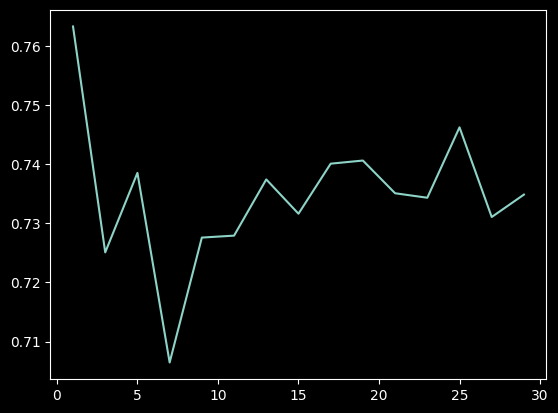

In [7]:
data = pandas.read_csv("wine.csv")
X = data.drop(columns=["quality"])
y = data["quality"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


ks = range(1, 31, 2)
precision_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision_scores.append(precision_score(y_test, y_pred, pos_label="good"))
plt.plot(ks, precision_scores)

Dále vytvoř graf, který bude pro několik parametrů `n_neighbors` obsahovat všechny čtyři výsledné metriky, které jsme si v kurzu ukázali: 
- `accuracy_score`, 
- `precision_score`, 
- `recall_score`, 
- `f1_score`. 

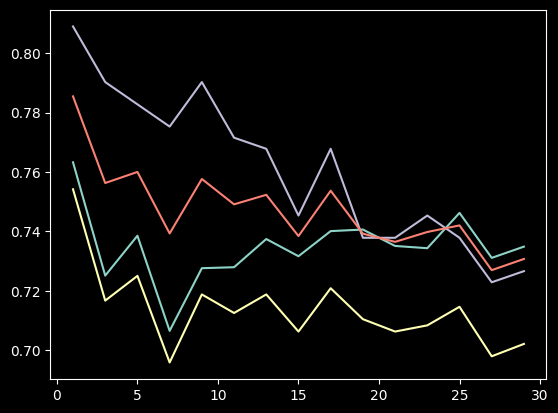

In [8]:
accuracy_scores = []
recall_scores = []
f1_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, pos_label="good"))
    f1_scores.append(f1_score(y_test, y_pred, pos_label="good"))

plt.plot(ks, precision_scores)
plt.plot(ks, accuracy_scores)
plt.plot(ks, recall_scores)
plt.plot(ks, f1_scores)